In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

california = fetch_california_housing()
X, y = california.data, california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2]:
model = RandomForestRegressor(n_estimators=1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.5794511337723942

In [3]:
import shap

explainer = shap.Explainer(model)

shap_values = explainer(pd.DataFrame(X_test, columns=california.feature_names))

/Users/pnferreira-m1/anaconda3/envs/koru/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
shap_values[0]

.values =
array([-0.78420115,  0.01181602,  0.10891523, -0.00106796, -0.02439364,
       -0.33793237, -0.21542356, -0.2494211 ])

.base_values =
2.056708522978959

.data =
array([ 1.68120000e+00,  2.50000000e+01,  4.19220056e+00,  1.02228412e+00,
        1.39200000e+03,  3.87743733e+00,  3.60600000e+01, -1.19010000e+02])

In [19]:
shap_values[0].values.sum() + shap_values[0].base_values

0.5649999999999975

In [16]:
model.predict(X_test[:1])

array([0.565])

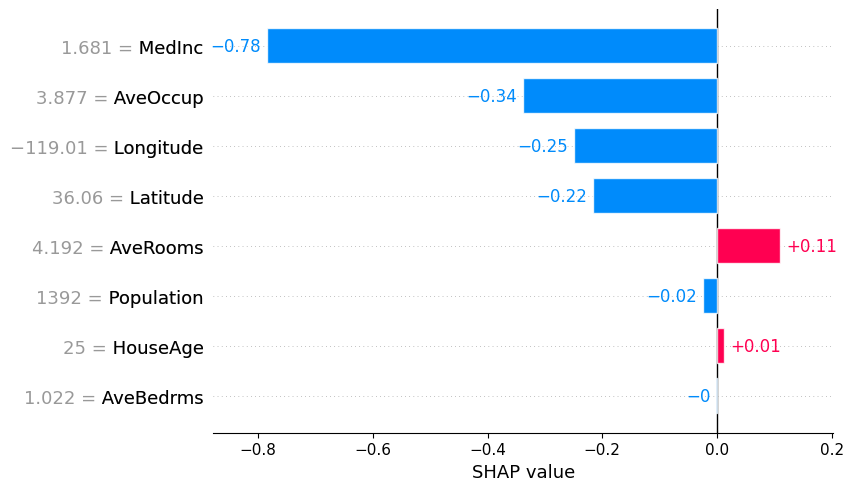

In [20]:
shap.plots.bar(shap_values[0])

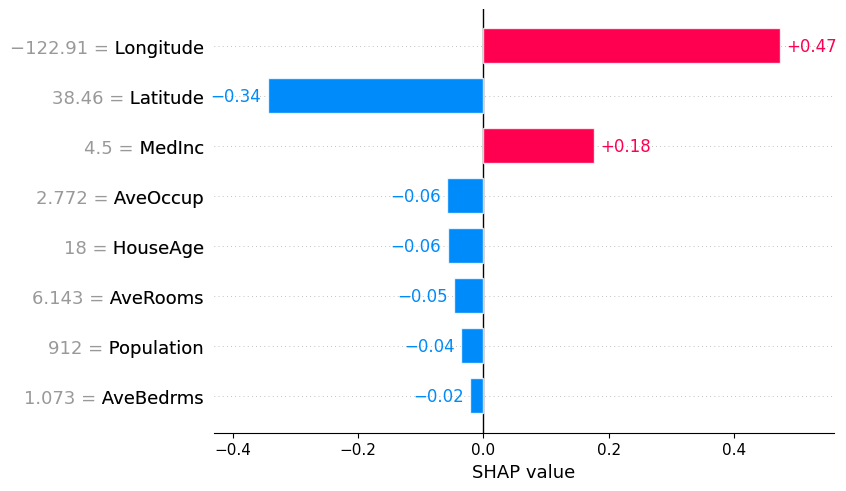

In [21]:
shap.plots.bar(shap_values[50])

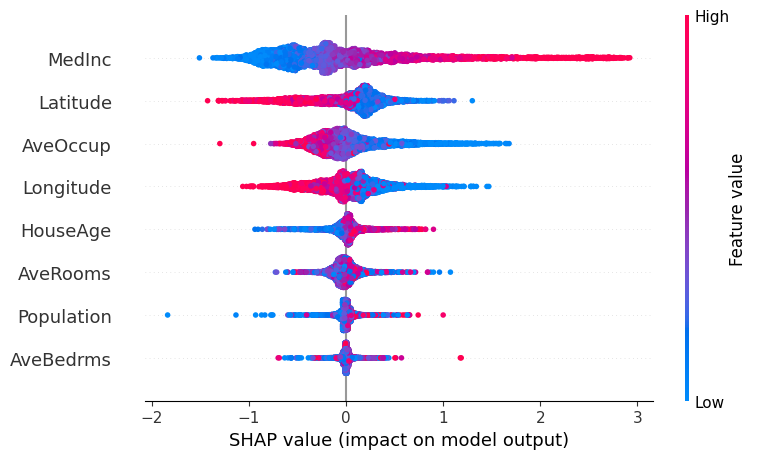

In [22]:
shap.summary_plot(shap_values, X_test, feature_names=california.feature_names)

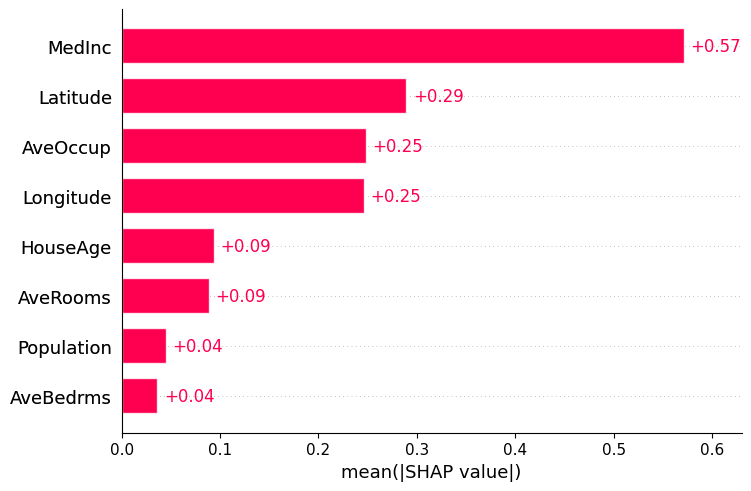

In [33]:
shap.plots.bar(shap_values.abs.mean(0))

([<matplotlib.axis.YTick at 0x30d52f0d0>,
 [Text(0, 0, 'AveBedrms'),
  Text(0, 1, 'Population'),
  Text(0, 2, 'AveRooms'),
  Text(0, 3, 'HouseAge'),
  Text(0, 4, 'Latitude'),
  Text(0, 5, 'Longitude'),
  Text(0, 6, 'AveOccup'),
  Text(0, 7, 'MedInc')])

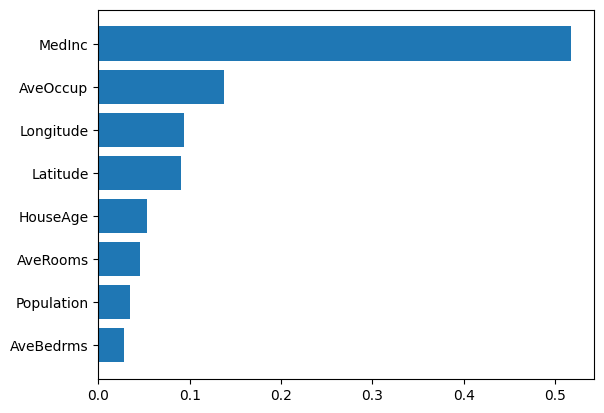

In [37]:
import numpy as np
importancia = model.feature_importances_
indices = np.argsort(importancia)

plt.barh(range(X.shape[1]), importancia[indices], align='center')
plt.yticks(range(X.shape[1]), np.array(california.feature_names)[indices])

<Axes: >

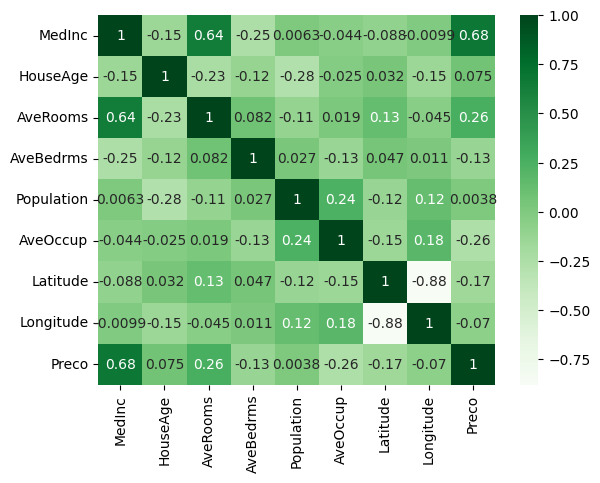

In [41]:
# correlação

df = pd.DataFrame(data=np.c_[X,y], columns=california.feature_names + ['Preco'])

sns.heatmap(df.corr(method='spearman'), annot=True, cmap='Greens')

In [4]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
import shap
import json
model = ResNet50(weights='imagenet')

X, y = shap.datasets.imagenet50()

url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]

In [5]:
y[0]

6381.0

In [6]:
masker = shap.maskers.Image('inpaint_telea', X[0].shape)

def f(X):
    tmp = X.copy()
    preprocess_input(tmp)
    return model(tmp)

explainer = shap.Explainer(f, masker, output_names=class_names)
shap_values = explainer(X[1:3].astype('uint8'), max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])



PartitionExplainer explainer: 3it [01:01, 30.98s/it]               


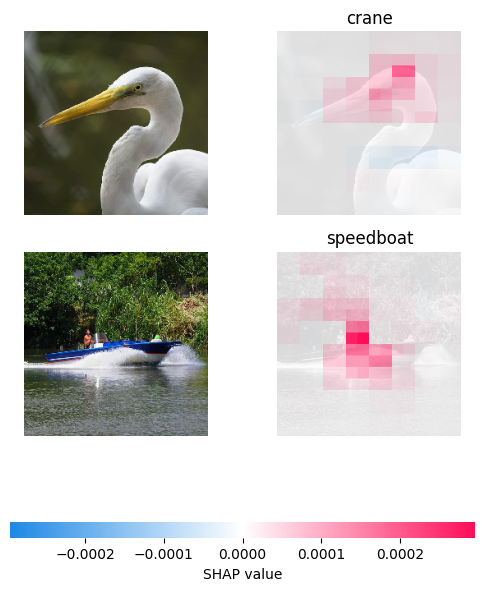

In [7]:
shap.image_plot(shap_values)